In [328]:
import warnings
import pandas as pd; warnings.simplefilter(action='ignore',category=FutureWarning)

# Reading in the datasets
channel_transactions = pd.read_csv("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\transactions_v2.csv")
channel_touchpoints = pd.read_csv("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\customer_touchpoints_v2.csv")
channel_customers = pd.read_csv("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\customers.csv")
channel_marketing_spend = pd.read_csv("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\marketing_spend.csv")
channel_marketing_campaigns = pd.read_csv("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\marketing_campaigns.csv")
channel_stores = pd.read_csv("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\stores.csv")



# Data Cleaning

## Transactions

In [329]:
channel_transactions.loc[channel_transactions.duplicated()]
## channel_transactions.drop_duplicates(keep = 'first', inplace = True) 



,TRANSACTION_ID,CUSTOMER_ID,ORDER_DATE,CHANNEL,STORE_ID,PAYMENT_METHOD,CARD_BANK,SUBTOTAL,DISCOUNT_AMOUNT,TAX_AMOUNT,SHIPPING_AMOUNT,TOTAL_AMOUNT,PROMO_CODE_USED,DEVICE_TYPE,FULFILLMENT_METHOD,RETURN_FLAG


In [330]:
channel_transactions.isnull().sum()


TRANSACTION_ID         0
CUSTOMER_ID            0
ORDER_DATE             0
CHANNEL                0
STORE_ID              29
PAYMENT_METHOD         0
CARD_BANK             41
SUBTOTAL               0
DISCOUNT_AMOUNT        0
TAX_AMOUNT             0
SHIPPING_AMOUNT        3
TOTAL_AMOUNT           0
PROMO_CODE_USED       26
DEVICE_TYPE           16
FULFILLMENT_METHOD     0
RETURN_FLAG            0
dtype: int64

In [331]:
cln_df_trans = channel_transactions.copy() #creates a copy
cln_df_trans.columns = cln_df_trans.columns.str.lower()

In [332]:
cln_df_trans['device_type'].fillna('Store', inplace=True)
cln_df_trans['promo_code_used'].fillna('None', inplace=True)
cln_df_trans.fillna({'shipping_amount':cln_df_trans.shipping_amount.mode()[0]},inplace=True)
cln_df_trans.drop(columns=["card_bank"], inplace=True)
cln_df_trans['store_id'].fillna(0, inplace=True) #check if you can do string 
cln_df_trans.isnull().sum()


transaction_id        0
customer_id           0
order_date            0
channel               0
store_id              0
payment_method        0
subtotal              0
discount_amount       0
tax_amount            0
shipping_amount       0
total_amount          0
promo_code_used       0
device_type           0
fulfillment_method    0
return_flag           0
dtype: int64

In [333]:
cln_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      45 non-null     int64  
 1   customer_id         45 non-null     int64  
 2   order_date          45 non-null     object 
 3   channel             45 non-null     object 
 4   store_id            45 non-null     float64
 5   payment_method      45 non-null     object 
 6   subtotal            45 non-null     float64
 7   discount_amount     45 non-null     float64
 8   tax_amount          45 non-null     float64
 9   shipping_amount     45 non-null     float64
 10  total_amount        45 non-null     float64
 11  promo_code_used     45 non-null     object 
 12  device_type         45 non-null     object 
 13  fulfillment_method  45 non-null     object 
 14  return_flag         45 non-null     bool   
dtypes: bool(1), float64(6), int64(2), object(6)
memory usage: 5

In [334]:
# cln_df_trans['store_id'] = cln_df_trans['store_id'].astype(float)

cln_df_trans = cln_df_trans.astype({
    'transaction_id': 'string',
    'customer_id': 'string',
    'store_id': int,
    'promo_code_used': 'string',
    'channel': 'category',
    'payment_method': 'category',
    'device_type': 'category',
    'fulfillment_method': 'category'
})

cln_df_trans['store_id'] = cln_df_trans['store_id'].astype('string')

cln_df_trans['order_date'] = pd.to_datetime(cln_df_trans['order_date'], format='mixed')


In [335]:
# Analyse categorical columns uniqueness
trans_cat_cols = ['channel', 'payment_method', 'device_type', 'fulfillment_method']

for col in trans_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_trans[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


CHANNEL:
  Unique list: ['Online', 'Store', 'Mobile App']

PAYMENT_METHOD:
  Unique list: ['Credit Card', 'Credit Cards', 'PayPal', 'Apple Pay', 'credit card', 'Cash', 'Debit Card', 'Google Pay', 'CC']

DEVICE_TYPE:
  Unique list: ['Mobile', 'Store', 'Desktop']

FULFILLMENT_METHOD:
  Unique list: ['Ship', 'In-Store', 'BOPIS']


In [336]:
# Convert to lowercase and strip whitespace
cln_df_trans['payment_method'] = cln_df_trans['payment_method'].str.lower().str.strip()

# Map variations to standardized labels
cln_df_trans['payment_method'] = cln_df_trans['payment_method'].replace({
    'credit card': 'Credit Card',
    'credit cards': 'Credit Card',
    'cc': 'Credit Card',
    'debit card': 'Debit Card',
    'paypal': 'PayPal',
    'apple pay': 'Apple Pay',
    'google pay': 'Google Pay',
    'cash': 'Cash'
})

## Touchpoints

In [337]:
channel_touchpoints.loc[channel_touchpoints.duplicated()]

,TOUCHPOINT_ID,CUSTOMER_ID,SESSION_ID,TOUCHPOINT_TIMESTAMP,TOUCHPOINT_TYPE,CHANNEL,CAMPAIGN_ID,REFERRER_SOURCE,LANDING_PAGE,PAGES_VIEWED,PRODUCTS_VIEWED,CART_ADDITIONS,CART_VALUE,CONVERTED_FLAG,TRANSACTION_ID,DEVICE_TYPE,STORE_ID


In [338]:
channel_touchpoints.isnull().sum()

TOUCHPOINT_ID            0
CUSTOMER_ID              0
SESSION_ID               0
TOUCHPOINT_TIMESTAMP     0
TOUCHPOINT_TYPE          0
CHANNEL                  0
CAMPAIGN_ID             12
REFERRER_SOURCE          5
LANDING_PAGE             8
PAGES_VIEWED             8
PRODUCTS_VIEWED          7
CART_ADDITIONS           0
CART_VALUE               0
CONVERTED_FLAG           0
TRANSACTION_ID           8
DEVICE_TYPE              5
STORE_ID                22
dtype: int64

In [339]:
cln_df_touchpoints = channel_touchpoints.copy()
cln_df_touchpoints.columns = cln_df_touchpoints.columns.str.lower()

In [340]:
cln_df_touchpoints['campaign_id'].fillna(0, inplace = True)
cln_df_touchpoints['referrer_source'].fillna('Walk In', inplace = True)
cln_df_touchpoints['landing_page'].fillna('NA', inplace = True)
cln_df_touchpoints['pages_viewed'].fillna((cln_df_touchpoints['pages_viewed'].median()), inplace = True)
cln_df_touchpoints['products_viewed'].fillna('None', inplace = True)
cln_df_touchpoints['transaction_id'].fillna(0, inplace = True)
cln_df_touchpoints['device_type'].fillna('Store', inplace = True)
cln_df_touchpoints['store_id'].fillna(0, inplace = True)
cln_df_touchpoints.isnull().sum()

touchpoint_id           0
customer_id             0
session_id              0
touchpoint_timestamp    0
touchpoint_type         0
channel                 0
campaign_id             0
referrer_source         0
landing_page            0
pages_viewed            0
products_viewed         0
cart_additions          0
cart_value              0
converted_flag          0
transaction_id          0
device_type             0
store_id                0
dtype: int64

In [341]:
cln_df_touchpoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   touchpoint_id         27 non-null     int64  
 1   customer_id           27 non-null     int64  
 2   session_id            27 non-null     object 
 3   touchpoint_timestamp  27 non-null     object 
 4   touchpoint_type       27 non-null     object 
 5   channel               27 non-null     object 
 6   campaign_id           27 non-null     float64
 7   referrer_source       27 non-null     object 
 8   landing_page          27 non-null     object 
 9   pages_viewed          27 non-null     float64
 10  products_viewed       27 non-null     object 
 11  cart_additions        27 non-null     int64  
 12  cart_value            27 non-null     float64
 13  converted_flag        27 non-null     bool   
 14  transaction_id        27 non-null     float64
 15  device_type           27 

In [342]:
cln_df_touchpoints = cln_df_touchpoints.astype({
    'touchpoint_id': 'string',
    'customer_id': 'string',
    'session_id': 'string',
    'campaign_id': 'int',
    'transaction_id': 'int',
    'store_id': 'int',
    'pages_viewed': 'int',
    'touchpoint_type': 'category',
    'channel': 'category',
    'referrer_source': 'category',
    'device_type': 'category'
})

cln_df_touchpoints = cln_df_touchpoints.astype({
    'campaign_id': 'string',
    'store_id': 'string',
    'transaction_id': 'string'
})

cln_df_touchpoints['touchpoint_timestamp'] = pd.to_datetime(cln_df_touchpoints['touchpoint_timestamp'], format='%m/%d/%y %H:%M')

In [343]:
# Analyse categorical columns uniqueness
tch_cat_cols = ['channel', 'touchpoint_type', 'device_type', 'referrer_source']

for col in tch_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_touchpoints[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


CHANNEL:
  Unique list: ['Instagram', 'Direct', 'Email', 'TikTok', 'Facebook', 'Google', 'Walk-in']

TOUCHPOINT_TYPE:
  Unique list: ['Ad Click', 'Web Visit', 'Email Open', 'Store Visit', 'Ad View']

DEVICE_TYPE:
  Unique list: ['Mobile', 'Desktop', 'Store']

REFERRER_SOURCE:
  Unique list: ['instagram.com', 'direct', 'gmail.com', 'tiktok.com', 'facebook.com', 'google.com', 'email', 'Walk In', 'outlook.com']


## Customers

In [344]:
# check for duplicate rows
channel_customers.loc[channel_customers.duplicated()]

,customer_id,first_name,last_name,email,city,state,age,gender,customer_segment,acquisition_date,acquisition_channel,lifetime_value,churn_risk
30,1030,Eric,Young,eric.y@email.com,Houston,TX,46,M,Dormant,12/1/20,Email,267.9,High


In [345]:
cln_df_customers = channel_customers.copy()
cln_df_customers.drop_duplicates(keep = 'first', inplace=True)
cln_df_customers.loc[cln_df_customers.duplicated()]

,customer_id,first_name,last_name,email,city,state,age,gender,customer_segment,acquisition_date,acquisition_channel,lifetime_value,churn_risk


In [346]:
cln_df_customers.isnull().sum()

customer_id            0
first_name             0
last_name              0
email                  0
city                   0
state                  0
age                    0
gender                 0
customer_segment       0
acquisition_date       0
acquisition_channel    0
lifetime_value         0
churn_risk             0
dtype: int64

In [347]:
cln_df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          30 non-null     int64  
 1   first_name           30 non-null     object 
 2   last_name            30 non-null     object 
 3   email                30 non-null     object 
 4   city                 30 non-null     object 
 5   state                30 non-null     object 
 6   age                  30 non-null     int64  
 7   gender               30 non-null     object 
 8   customer_segment     30 non-null     object 
 9   acquisition_date     30 non-null     object 
 10  acquisition_channel  30 non-null     object 
 11  lifetime_value       30 non-null     float64
 12  churn_risk           30 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 3.3+ KB


In [348]:
cln_df_customers = cln_df_customers.astype({
    'customer_id': 'string',
    'first_name': 'string',
    'last_name': 'string',
    'email': 'string',
    'city': 'string',
    'state': 'string',
    'gender': 'category',
    'customer_segment': 'category',
    'acquisition_channel': 'category',
    'churn_risk': 'category'
})

cln_df_customers['acquisition_date'] = pd.to_datetime(cln_df_customers['acquisition_date'], format='%m/%d/%y')

In [349]:
# Analyse categorical columns uniqueness
cust_cat_cols = ['gender', 'customer_segment', 'acquisition_channel', 'churn_risk']

for col in cust_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_customers[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


GENDER:
  Unique list: ['F', 'M']

CUSTOMER_SEGMENT:
  Unique list: ['Occasional', 'High-Value', 'Frequent', 'New', 'Dormant']

ACQUISITION_CHANNEL:
  Unique list: ['Social Media', 'Google', 'Email', 'Direct', 'Instagram', 'Referral', 'Facebook', 'TikTok']

CHURN_RISK:
  Unique list: ['Low', 'Medium', 'High']


## Marketing Spend

In [350]:
channel_marketing_spend.loc[channel_marketing_spend.duplicated()]

,spend_id,campaign_id,spend_date,channel,impressions,clicks,spend_amount,conversions,revenue_attributed


In [351]:
channel_marketing_spend.isnull().sum()

spend_id              0
campaign_id           0
spend_date            0
channel               0
impressions           0
clicks                0
spend_amount          0
conversions           0
revenue_attributed    0
dtype: int64

In [352]:
cln_df_mkt_spnd = channel_marketing_spend.copy()

In [353]:
cln_df_mkt_spnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spend_id            30 non-null     int64  
 1   campaign_id         30 non-null     int64  
 2   spend_date          30 non-null     object 
 3   channel             30 non-null     object 
 4   impressions         30 non-null     int64  
 5   clicks              30 non-null     int64  
 6   spend_amount        30 non-null     float64
 7   conversions         30 non-null     int64  
 8   revenue_attributed  30 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.2+ KB


In [354]:
cln_df_mkt_spnd = cln_df_mkt_spnd.astype({
    'spend_id': 'string',
    'campaign_id': 'string',
    'channel': 'category'
})

cln_df_mkt_spnd['spend_date'] = pd.to_datetime(cln_df_mkt_spnd['spend_date'], format='mixed')

In [355]:
# Analyse categorical columns uniqueness

print(f"  Unique list: {cln_df_mkt_spnd['channel'].unique().tolist()}")


  Unique list: ['Instagram', 'Google', 'Email', 'Facebook', 'TikTok']


## Marketing Campaign

In [356]:
channel_marketing_campaigns.loc[channel_marketing_campaigns.duplicated()]

,campaign_id,campaign_name,campaign_type,channel,start_date,end_date,budget,target_audience,campaign_goal,status


In [357]:
channel_marketing_campaigns.isnull().sum()

campaign_id        0
campaign_name      0
campaign_type      0
channel            0
start_date         0
end_date           0
budget             0
target_audience    0
campaign_goal      0
status             0
dtype: int64

In [358]:
cln_df_mkt_cmp = channel_marketing_campaigns.copy()

In [359]:
cln_df_mkt_cmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   campaign_id      30 non-null     int64 
 1   campaign_name    30 non-null     object
 2   campaign_type    30 non-null     object
 3   channel          30 non-null     object
 4   start_date       30 non-null     object
 5   end_date         30 non-null     object
 6   budget           30 non-null     int64 
 7   target_audience  30 non-null     object
 8   campaign_goal    30 non-null     object
 9   status           30 non-null     object
dtypes: int64(2), object(8)
memory usage: 2.5+ KB


In [360]:
cln_df_mkt_cmp = cln_df_mkt_cmp.astype({
    'campaign_id': 'string',
    'campaign_name': 'string',
    'campaign_type': 'category',
    'channel': 'category',
    'target_audience': 'category',
    'campaign_goal': 'category',
    'status': 'category'
})

cln_df_mkt_cmp['start_date'] = pd.to_datetime(cln_df_mkt_cmp['start_date'], format='%Y-%m-%d')
cln_df_mkt_cmp['end_date'] = pd.to_datetime(cln_df_mkt_cmp['end_date'], format='%Y-%m-%d')

# cln_df_mkt_cmp['start_date'] = cln_df_mkt_cmp['start_date'].dt.strftime('%m/%d/%y')
# cln_df_mkt_cmp['end_date'] = cln_df_mkt_cmp['end_date'].dt.strftime('%m/%d/%y')


In [361]:
# Analyse categorical columns uniqueness
camp_cat_cols = ['campaign_type', 'channel', 'target_audience', 'campaign_goal', 'status']

for col in camp_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_mkt_cmp[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


CAMPAIGN_TYPE:
  Unique list: ['Promotional', 'Sales', 'Retention', 'Influencer', 'Performance', 'Event', 'Product Launch']

CHANNEL:
  Unique list: ['Instagram', 'Google', 'Email', 'Facebook', 'TikTok', 'Direct Mail', 'Push Notification']

TARGET_AUDIENCE:
  Unique list: ['18-35 Female', 'All Segments', 'Existing Customers', '25-45 Active', '18-25 All', 'Cart Abandoners', 'Local Residents', 'Dormant Customers', 'App Users', 'High-Value Customers', '16-24 All', 'Frequent Shoppers', 'Site Visitors', 'Inactive Users']

CAMPAIGN_GOAL:
  Unique list: ['Brand Awareness', 'Revenue', 'Engagement', 'Acquisition', 'Conversion', 'Traffic', 'Reactivation']

STATUS:
  Unique list: ['Completed', 'Active', 'Planned']


## Stores

In [362]:
channel_stores.loc[channel_stores.duplicated()]

,store_id,store_name,store_type,city,state,square_footage,manager_name,opened_date,zone


In [363]:
channel_stores.isnull().sum()

store_id          0
store_name        0
store_type        0
city              0
state             0
square_footage    0
manager_name      0
opened_date       0
zone              0
dtype: int64

In [364]:
cln_df_stores = channel_stores.copy()

In [365]:
cln_df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   store_id        15 non-null     int64 
 1   store_name      15 non-null     object
 2   store_type      15 non-null     object
 3   city            15 non-null     object
 4   state           15 non-null     object
 5   square_footage  15 non-null     int64 
 6   manager_name    15 non-null     object
 7   opened_date     15 non-null     object
 8   zone            15 non-null     object
dtypes: int64(2), object(7)
memory usage: 1.2+ KB


In [366]:
cln_df_stores = cln_df_stores.astype({
    'store_id': 'string',
    'store_name': 'string',
    'store_type': 'category',
    'city': 'category',
    'state': 'category',
    'manager_name': 'string',
    'zone': 'category'
})

cln_df_stores['opened_date'] = pd.to_datetime(cln_df_stores['opened_date'], format='%Y-%m-%d')


In [367]:

# Analyse categorical columns uniqueness
stores_cat_cols = ['store_type', 'city', 'state', 'zone']

for col in stores_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_stores[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


STORE_TYPE:
  Unique list: ['Flagship', 'Standard', 'Outlet', 'Pop-up']

CITY:
  Unique list: ['Austin', 'Dallas', 'Houston', 'San Antonio', 'Fort Worth', 'El Paso', 'Plano', 'Arlington']

STATE:
  Unique list: ['TX']

ZONE:
  Unique list: ['Central', 'North', 'South', 'West']


In [368]:
# # ## Output Cleaned Datasets

# filepath = "..\\team-project\\"
 
# # Your cleaned datasets
# datasets = [cln_df_customers, cln_df_mkt_cmp, cln_df_mkt_spnd, cln_df_stores, cln_df_touchpoints, cln_df_trans]
 
# # Corresponding names for the files
# dataset_names = ["customers", "marketing_campaign", "marketing_spend", "stores", "touchpoints", "transactions"]
 
# # Save each dataset with its name
# for df, name in zip(datasets, dataset_names):
#     filename = f"{filepath}{name}_cleaned.parquet"
#     df.to_parquet(filename, index=False)

In [369]:
# # #Re initializes to the cleaned cvs files 

cln_df_trans = pd.read_parquet("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\transactions_cleaned.parquet")
cln_df_touchpoints = pd.read_parquet("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\touchpoints_cleaned.parquet")
cln_df_customers = pd.read_parquet("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\customers_cleaned.parquet")
cln_df_mkt_spnd = pd.read_parquet("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\marketing_spend_cleaned.parquet")
cln_df_mkt_cmp = pd.read_parquet("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\marketing_campaign_cleaned.parquet")
cln_df_stores = pd.read_parquet("C:\\Labs\\EIC_Project\\Labs\\Resources\\team-project\\stores_cleaned.parquet")

# Descriptive Analysis


## Touchpoints

Touchpoint count per journey:
1    13
2     4
3     2
Name: count, dtype: int64
Touchpoints mean: 1.4210526315789473
Touchpoints median: 1.0

Summary:
Total customers: 19
Single-touch journeys: 13
Multi-touch journeys: 6
Most common journey length: 1 touchpoint(s)


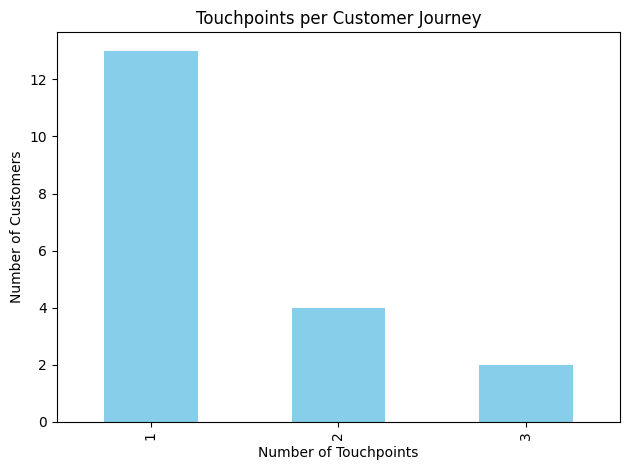

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

# Count touchpoints per customer
touchpoint_counts = cln_df_touchpoints.groupby("customer_id").size()
 
# Create distribution
distribution = touchpoint_counts.value_counts().sort_index()
tchpoint_mean = touchpoint_counts.mean()
tchpoint_median = touchpoint_counts.median()
 
# Print summary
print("Touchpoint count per journey:")
print(distribution)
print(f"Touchpoints mean: {tchpoint_mean}")
print(f"Touchpoints median: {tchpoint_median}")

# Summary stats
print("\nSummary:")
print(f"Total customers: {len(touchpoint_counts)}")
print(f"Single-touch journeys: {(touchpoint_counts == 1).sum()}")
print(f"Multi-touch journeys: {(touchpoint_counts > 1).sum()}")
print(f"Most common journey length: {touchpoint_counts.value_counts().idxmax()} touchpoint(s)")
 
# Plot
distribution.plot(kind="bar", color="skyblue", title="Touchpoints per Customer Journey")
plt.xlabel("Number of Touchpoints")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

In [371]:
for col in tch_cat_cols:
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {cln_df_touchpoints[col].nunique()}")
    print(f"  Unique list: {cln_df_touchpoints[col].unique().tolist()}")
    print(f"\n  Value counts:")
    print(cln_df_touchpoints[col].value_counts())


CHANNEL:
  Unique values: 7
  Unique list: ['Instagram', 'Direct', 'Email', 'TikTok', 'Facebook', 'Google', 'Walk-in']

  Value counts:
channel
Direct       7
Email        6
Walk-in      5
Google       4
Instagram    2
TikTok       2
Facebook     1
Name: count, dtype: int64

TOUCHPOINT_TYPE:
  Unique values: 5
  Unique list: ['Ad Click', 'Web Visit', 'Email Open', 'Store Visit', 'Ad View']

  Value counts:
touchpoint_type
Web Visit      14
Store Visit     5
Ad Click        4
Email Open      3
Ad View         1
Name: count, dtype: int64

DEVICE_TYPE:
  Unique values: 3
  Unique list: ['Mobile', 'Desktop', 'Store']

  Value counts:
device_type
Mobile     14
Desktop     8
Store       5
Name: count, dtype: int64

REFERRER_SOURCE:
  Unique values: 9
  Unique list: ['instagram.com', 'direct', 'gmail.com', 'tiktok.com', 'facebook.com', 'google.com', 'email', 'Walk In', 'outlook.com']

  Value counts:
referrer_source
direct           7
Walk In          5
google.com       4
email            3


In [372]:
# Create boxplots for numeric columns
# fig, ax = plt.subplots()
 
# Pages viewed boxplot
# ax.boxplot(cln_df_touchpoints.groupby(['customer_id'].dropna(), vert=True))
# ax.set_title('Pages Viewed Distribution', fontsize=12, fontweight='bold')
# ax.set_ylabel('Pages Viewed')
# ax.grid(True, alpha=0.3)
 
# # Cart additions boxplot
# axes[1].boxplot(cln_df_touchpoints['cart_additions'].dropna(), vert=True)
# axes[1].set_title('Cart Additions Distribution', fontsize=12, fontweight='bold')
# axes[1].set_ylabel('Cart Additions')
# axes[1].grid(True, alpha=0.3)
 
# # Cart value boxplot (non-zero)
# cart_values_nonzero = cln_df_touchpoints['cart_value'][cln_df_touchpoints['cart_value'] > 0].dropna()
# axes[2].boxplot(cart_values_nonzero, vert=True)
# axes[2].set_title('Cart Value Distribution (Non-zero)', fontsize=12, fontweight='bold')
# axes[2].set_ylabel('Cart Value ($)')
# axes[2].grid(True, alpha=0.3)
 
# plt.tight_layout()
# plt.show()
 
# # Identify outliers
# Q1 = cln_df_touchpoints['cart_value'].quantile(0.25)
# Q3 = cln_df_touchpoints['cart_value'].quantile(0.75)
# IQR = Q3 - Q1
# outliers = cln_df_touchpoints[
#     (cln_df_touchpoints['cart_value'] < Q1 - 1.5 * IQR) |
#     (cln_df_touchpoints['cart_value'] > Q3 + 1.5 * IQR)
# ]
# print(f"\nFound {len(outliers)} outliers in cart_value (using IQR method)")

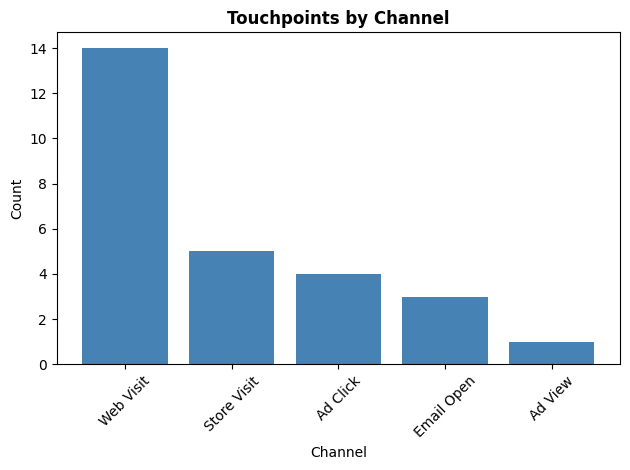

In [373]:
# Create bar charts for categorical variables

# Channel distribution

fig, ax = plt.subplots()

channel_counts = cln_df_touchpoints['touchpoint_type'].value_counts()
ax.bar(channel_counts.index, channel_counts.values, color='steelblue')
ax.set_title('Touchpoints by Channel', fontsize=12, fontweight='bold')
ax.set_xlabel('Channel')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

  touchpoint_type  converted_flag  conversion_rate
0        Ad Click        0.000000         0.000000
1         Ad View        1.000000       100.000000
2      Email Open        0.333333        33.333333
3     Store Visit        1.000000       100.000000
4       Web Visit        0.857143        85.714286


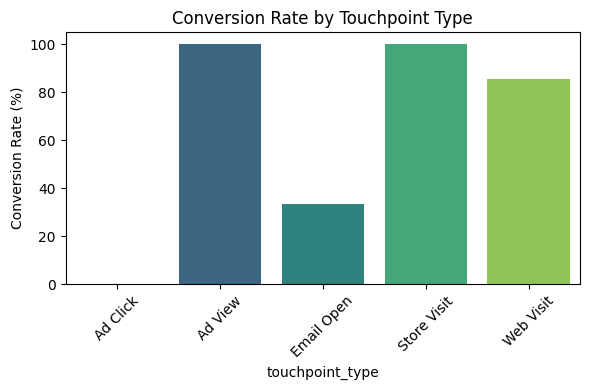

In [374]:
# Calculate conversion rate by touchpoint_type
conversion_rate = cln_df_touchpoints.groupby('touchpoint_type')['converted_flag'].mean().reset_index()
conversion_rate['conversion_rate'] = conversion_rate['converted_flag'] * 100

print(conversion_rate)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(data=conversion_rate, x='touchpoint_type', y='conversion_rate', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Touchpoint Type')
plt.tight_layout()
plt.show()

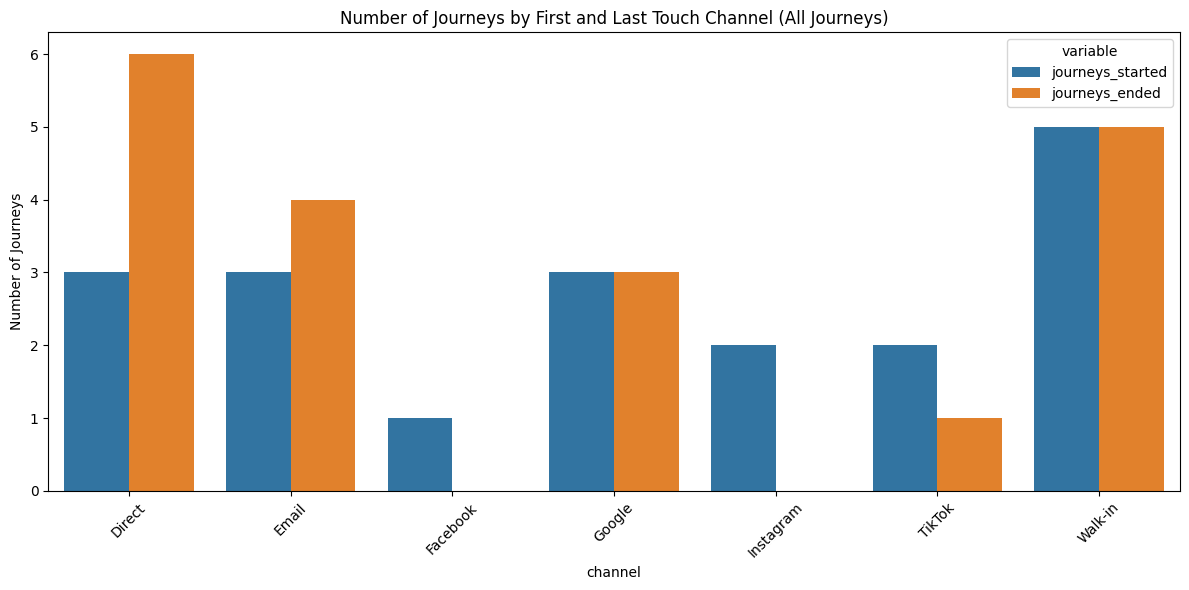

In [375]:

# Sort by timestamp
cln_df_touchpoints_sorted = cln_df_touchpoints.sort_values(by=['customer_id', 'touchpoint_timestamp'])

# Get first and last touch channel per customer
first_touch = cln_df_touchpoints_sorted.groupby('customer_id').first().reset_index()
last_touch = cln_df_touchpoints_sorted.groupby('customer_id').last().reset_index()

# Count number of journeys by first and last touch channel (all journeys)
first_all = first_touch['channel'].value_counts().reset_index()
first_all.columns = ['channel', 'journeys_started']

last_all = last_touch['channel'].value_counts().reset_index()
last_all.columns = ['channel', 'journeys_ended']

# Merge all data
summary = pd.merge(first_all, last_all, on='channel', how='outer')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=summary.melt(id_vars='channel', value_vars=['journeys_started', 'journeys_ended']), x='channel', y='value', hue='variable')
plt.title('Number of Journeys by First and Last Touch Channel (All Journeys)')
plt.ylabel('Number of Journeys')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [376]:
journey_duration = cln_df_touchpoints.groupby('customer_id')['touchpoint_timestamp'].agg(['min', 'max'])
journey_duration['duration'] = (journey_duration['max'] - journey_duration['min'])
jrny_dur_avg = journey_duration['duration'].mean()
jrny_dur_med = journey_duration['duration'].median()
jrny_dur_max = journey_duration['duration'].max()

print(f"Average Journey Duration: {jrny_dur_avg}")
print(f"Median Journey Duration: {jrny_dur_med}")
print(f"Max Journey Duration: {jrny_dur_max}")



Average Journey Duration: 0 days 09:34:44.210526315
Median Journey Duration: 0 days 00:00:00
Max Journey Duration: 2 days 02:45:00


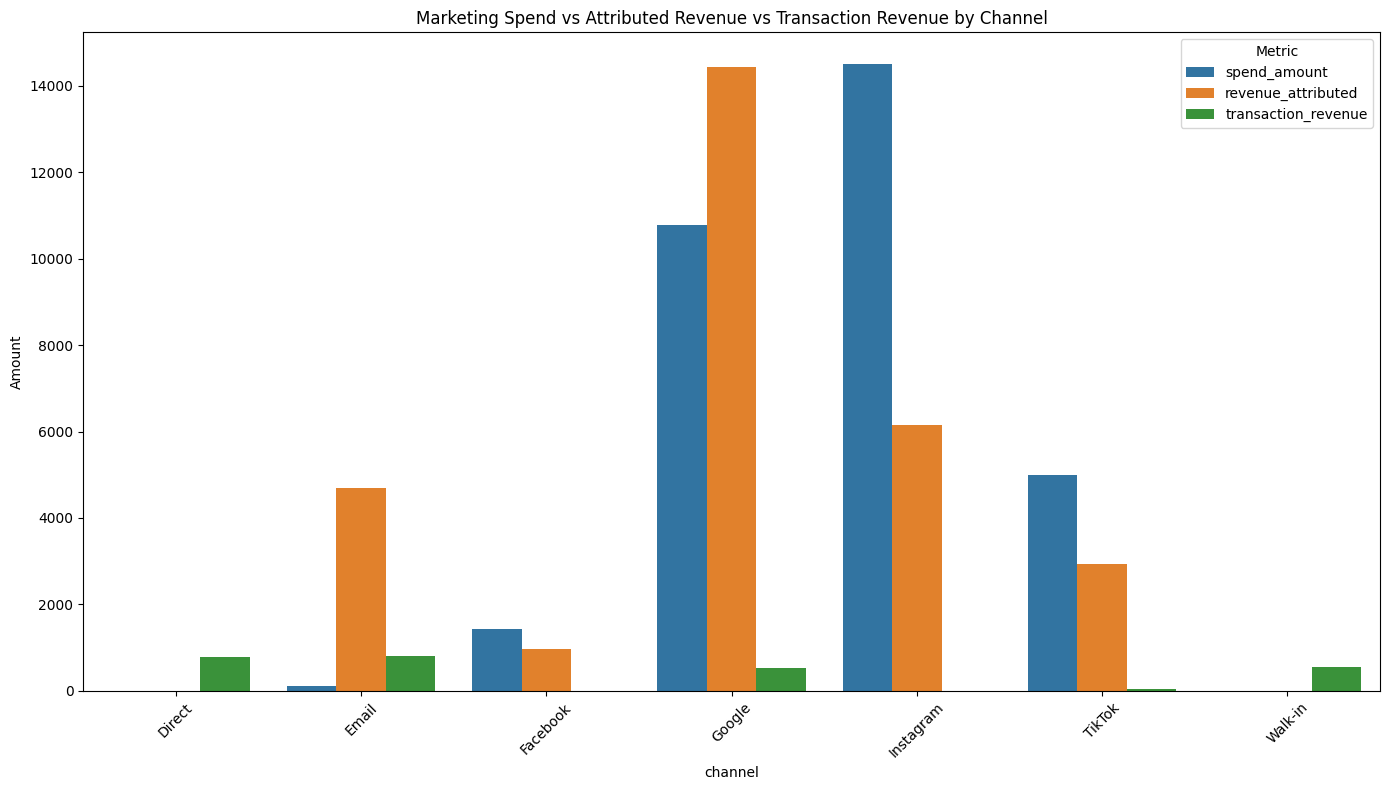

In [377]:

# Filter only converted touchpoints with valid transaction_id
converted_touchpoints = cln_df_touchpoints[cln_df_touchpoints['converted_flag'] == True].copy()

# Merge with transactions to get revenue
merged_tchp_trans = pd.merge(
    converted_touchpoints,
    cln_df_trans[['transaction_id', 'total_amount']],
    on='transaction_id',
    how='left'
)

# Since each transaction has only one touchpoint, first and last touch are the same
# Aggregate revenue by channel
revenue_by_channel = converted_touchpoints.groupby('channel')['cart_value'].sum().reset_index()
revenue_by_channel.columns = ['channel', 'transaction_revenue']

# Aggregate marketing spend and attributed revenue by channel
marketing_summary = cln_df_mkt_spnd.groupby('channel').agg({
    'spend_amount': 'sum',
    'revenue_attributed': 'sum'
}).reset_index()

# Merge with market spend revenue
combined = pd.merge(marketing_summary, revenue_by_channel, on='channel', how='outer').fillna(0)

# Calculate ROI
combined['ROI'] = combined['transaction_revenue'] / combined['spend_amount']
combined['ROI'] = combined['ROI'].replace([float('inf'), -float('inf')], 0)

# Melt for visualization
melted = combined.melt(id_vars='channel', value_vars=['spend_amount', 'revenue_attributed', 'transaction_revenue'],
                       var_name='Metric', value_name='Amount')

# Plot spend vs revenue vs ROI
plt.figure(figsize=(14, 8))
sns.barplot(data=melted, x='channel', y='Amount', hue='Metric')
plt.title('Marketing Spend vs Attributed Revenue vs Transaction Revenue by Channel')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("spend_vs_revenue_by_channel.png")
plt.show()

# Save combined summary
# combined.to_csv("marketing_vs_transaction_revenue_summary.csv", index=False)

In [378]:


# # Filter converted transactions
# converted_transactions = transactions[transactions['return_flag'] == False]

# # Initialize a list to collect revenue attribution
# attribution_records = []

# # Iterate over each converted transaction
# for _, txn in converted_transactions.iterrows():
#     customer_id = txn['customer_id']
#     txn_id = txn['transaction_id']
#     txn_time = txn['order_date']
#     txn_revenue = txn['total_amount']

#     # Get all touchpoints for this customer before the transaction time
#     customer_touchpoints = touchpoints[
#         (touchpoints['customer_id'] == customer_id) &
#         (touchpoints['touchpoint_timestamp'] <= txn_time)
#     ]

#     # Get unique marketing channels involved in the journey
#     channels = customer_touchpoints['channel'].dropna().unique()

#     # Distribute revenue equally across channels
#     if len(channels) > 0:
#         revenue_per_channel = txn_revenue / len(channels)
#         for channel in channels:
#             attribution_records.append({'channel': channel, 'revenue': revenue_per_channel})

# # Create a DataFrame from attribution records
# assisted_attribution_df = pd.DataFrame(attribution_records)

# # Aggregate revenue per channel
# channel_revenue = assisted_attribution_df.groupby('channel')['revenue'].sum().reset_index()
# channel_revenue['revenue_pct'] = 100 * channel_revenue['revenue'] / channel_revenue['revenue'].sum()

# # Sort by revenue percentage
# channel_revenue = channel_revenue.sort_values(by='revenue_pct', ascending=False)

# # Plot the assisted revenue attribution
# plt.figure(figsize=(12, 6))
# sns.barplot(data=channel_revenue, x='channel', y='revenue_pct', palette='viridis')
# plt.title('Assisted Revenue Attribution by Marketing Channel')
# plt.ylabel('Revenue Attribution (%)')
# plt.xlabel('Marketing Channel')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig("assisted_revenue_attribution.png")
# plt.show()

# # Save the attribution data to CSV
# channel_revenue.to_csv("assisted_revenue_attribution.csv", index=False)

## Categorical Data Analysis


CATEGORICAL DATA ANALYSIS

1. Touchpoint Channels:
  Unique values: 7
  Top 3: Direct, Email, Walk-in
  Value counts:
channel
Direct       7
Email        6
Walk-in      5
Google       4
Instagram    2
TikTok       2
Facebook     1
Name: count, dtype: int64

2. Device Types:
  Unique values: 3
  Value counts:
device_type
Mobile     14
Desktop     8
Store       5
Name: count, dtype: int64

3. Touchpoint Types:
  Unique values: 5
  Value counts:
touchpoint_type
Web Visit      14
Store Visit     5
Ad Click        4
Email Open      3
Ad View         1
Name: count, dtype: int64

Transaction Channels:
  Value counts:
channel
Online        20
Store         16
Mobile App     9
Name: count, dtype: int64

Campaign Types:
  Value counts:
campaign_type
Sales             9
Promotional       6
Event             3
Performance       3
Influencer        3
Product Launch    3
Retention         3
Name: count, dtype: int64


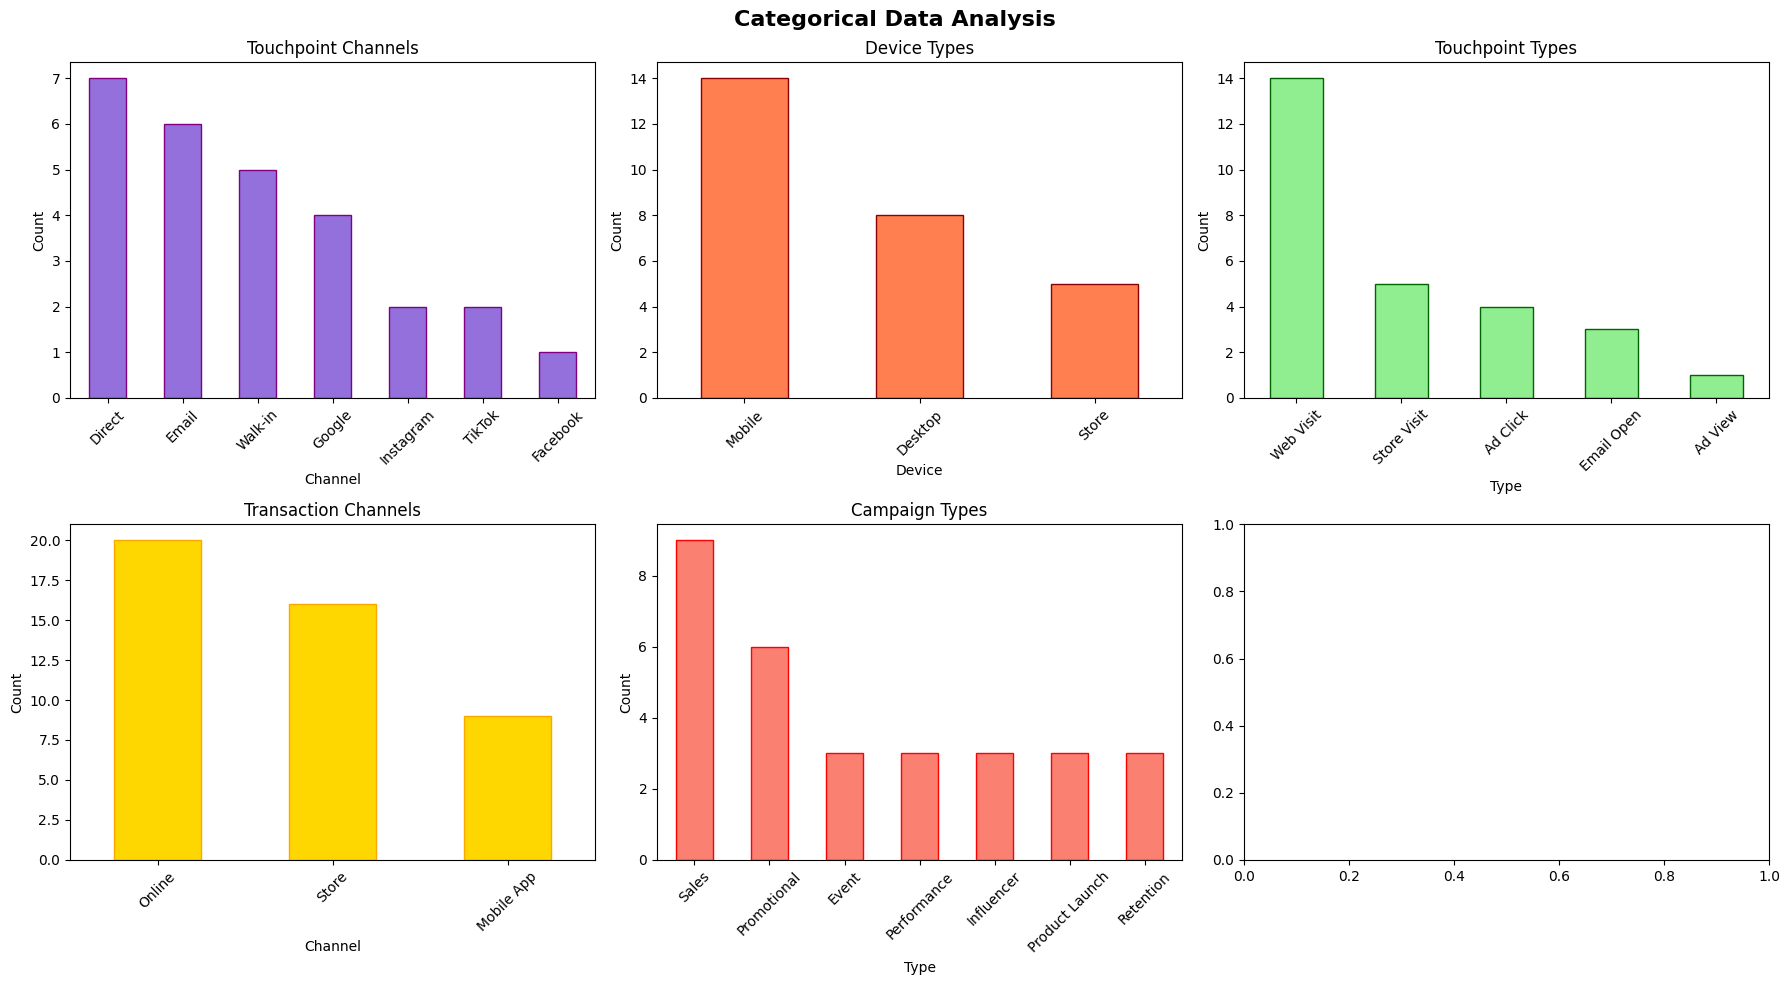

In [379]:
print("\n" + "=" * 60)
print("CATEGORICAL DATA ANALYSIS")
print("=" * 60)

# Create visualizations for categorical data
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Categorical Data Analysis', fontsize=16, fontweight='bold')

# 1. Channel distribution in touchpoints
print("\n1. Touchpoint Channels:")
channel_counts = cln_df_touchpoints['channel'].value_counts()
print(f"  Unique values: {cln_df_touchpoints['channel'].nunique()}")
print(f"  Top 3: {', '.join(channel_counts.head(3).index.tolist())}")
print("  Value counts:")
print(channel_counts)

ax1 = axes[0, 0]
channel_counts.plot(kind='bar', ax=ax1, color='mediumpurple', edgecolor='purple')
ax1.set_title('Touchpoint Channels')
ax1.set_xlabel('Channel')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# 2. Device types
print("\n2. Device Types:")
device_counts = cln_df_touchpoints['device_type'].value_counts()
print(f"  Unique values: {cln_df_touchpoints['device_type'].nunique()}")
print("  Value counts:")
print(device_counts)

ax2 = axes[0, 1]
device_counts.plot(kind='bar', ax=ax2, color='coral', edgecolor='darkred')
ax2.set_title('Device Types')
ax2.set_xlabel('Device')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

# 3. Touchpoint types
print("\n3. Touchpoint Types:")
touchpoint_counts = cln_df_touchpoints['touchpoint_type'].value_counts()
print(f"  Unique values: {cln_df_touchpoints['touchpoint_type'].nunique()}")
print("  Value counts:")
print(touchpoint_counts)

ax3 = axes[0, 2]
touchpoint_counts.plot(kind='bar', ax=ax3, color='lightgreen', edgecolor='darkgreen')
ax3.set_title('Touchpoint Types')
ax3.set_xlabel('Type')
ax3.set_ylabel('Count')
ax3.tick_params(axis='x', rotation=45)


# Replot after fixing
# channel_fixed = cln_df_touchpoints['channel'].value_counts()
# ax4 = axes[1, 0]
# channel_fixed.plot(kind='bar', ax=ax4, color='mediumpurple', edgecolor='purple')
# ax4.set_title('Channels (After Standardization)')
# ax4.set_xlabel('Channel')
# ax4.set_ylabel('Count')
# ax4.tick_params(axis='x', rotation=45)

# Transaction channels
print("\nTransaction Channels:")
trans_channel_counts = cln_df_trans['channel'].value_counts()
print("  Value counts:")
print(trans_channel_counts)

ax4 = axes[1, 0]
trans_channel_counts.plot(kind='bar', ax=ax4, color='gold', edgecolor='orange')
ax4.set_title('Transaction Channels')
ax4.set_xlabel('Channel')
ax4.set_ylabel('Count')
ax4.tick_params(axis='x', rotation=45)

# Campaign types
print("\nCampaign Types:")
campaign_types = cln_df_mkt_cmp['campaign_type'].value_counts()
print("  Value counts:")
print(campaign_types)

ax5 = axes[1, 1]
campaign_types.plot(kind='bar', ax=ax5, color='salmon', edgecolor='red')
ax5.set_title('Campaign Types')
ax5.set_xlabel('Type')
ax5.set_ylabel('Count')
ax5.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Numerical Data Analysis


NUMERIC DATA ANALYSIS

1. Cart Values:
  Mean: $142.31
  Median: $149.99
  Std Dev: $75.90

2. Pages Viewed:
  Mean: 6.22
  Median: 5.00
  Std Dev: 4.02

3. Transaction Values:
  Mean: $111.24
  Median: $93.99
  Std Dev: $62.41


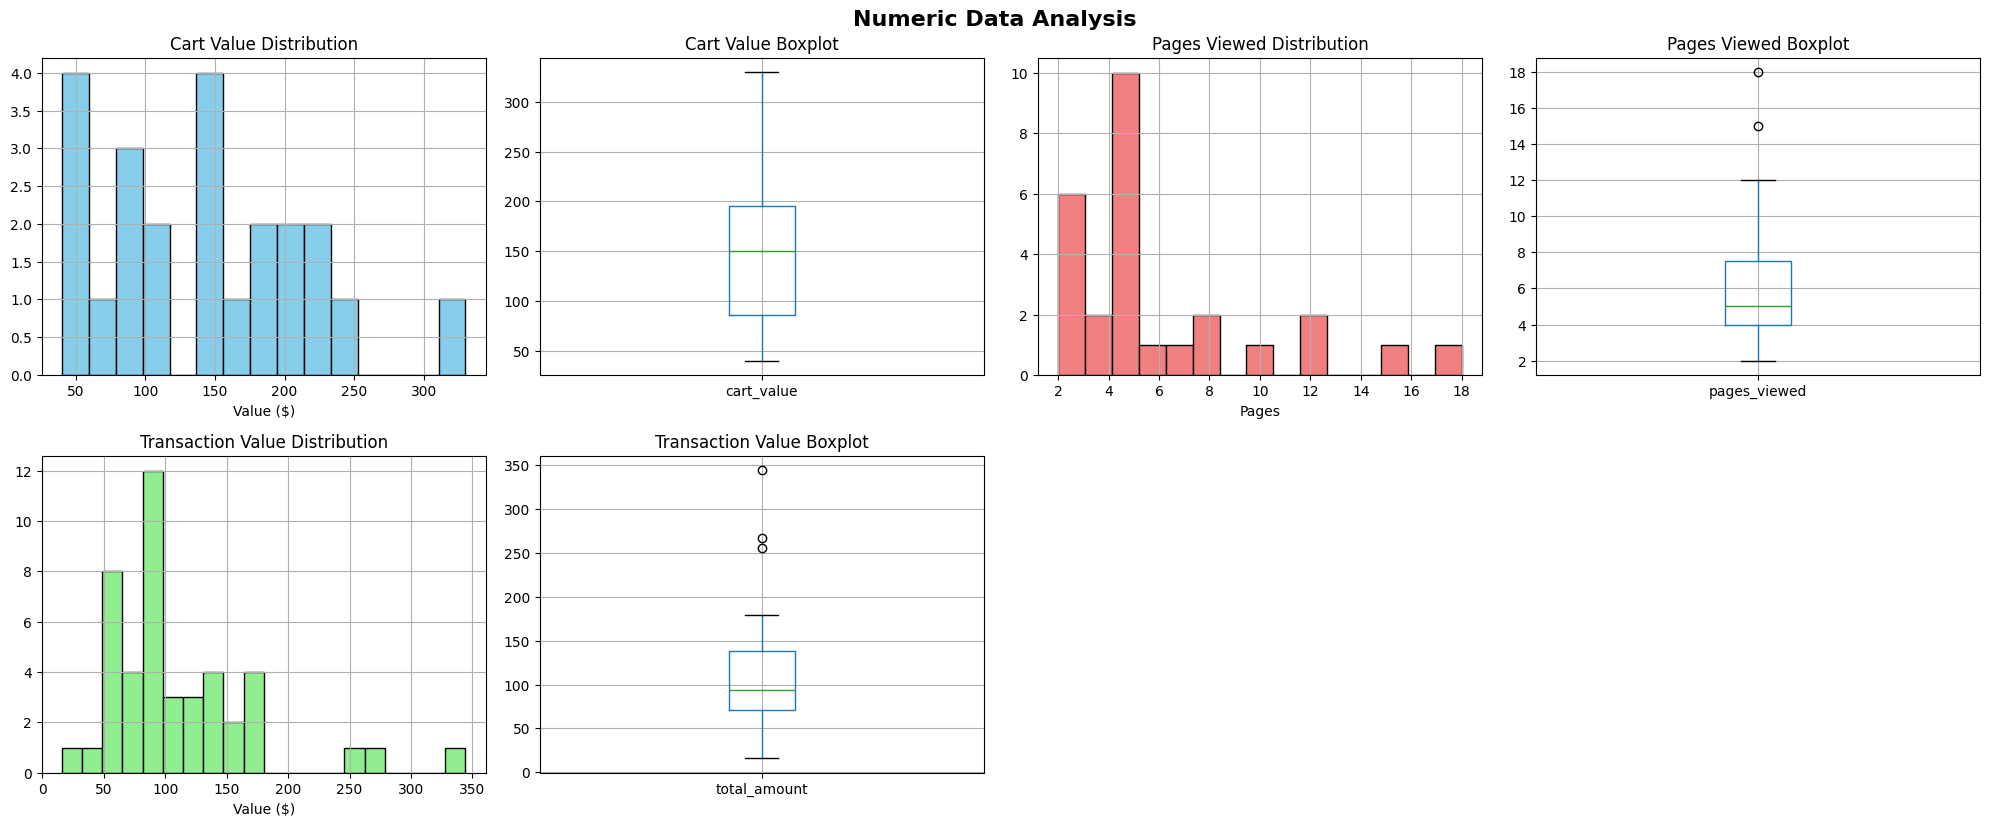

In [380]:
print("\n" + "=" * 60)
print("NUMERIC DATA ANALYSIS")
print("=" * 60)

# Create histograms and boxplots for numeric columns
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle('Numeric Data Analysis', fontsize=16, fontweight='bold')

# 1. Cart values in touchpoints
cart_values = cln_df_touchpoints[cln_df_touchpoints['cart_value'] > 0]['cart_value']
print("\n1. Cart Values:")
print(f"  Mean: ${cart_values.mean():.2f}")
print(f"  Median: ${cart_values.median():.2f}")
print(f"  Std Dev: ${cart_values.std():.2f}")

ax1 = axes[0, 0]
cart_values.hist(bins=15, ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Cart Value Distribution')
ax1.set_xlabel('Value ($)')

ax2 = axes[0, 1]
pd.DataFrame(cart_values).boxplot(ax=ax2)
ax2.set_title('Cart Value Boxplot')

# 2. Pages viewed
pages = cln_df_touchpoints[cln_df_touchpoints['pages_viewed'] > 0]['pages_viewed']
print("\n2. Pages Viewed:")
print(f"  Mean: {pages.mean():.2f}")
print(f"  Median: {pages.median():.2f}")
print(f"  Std Dev: {pages.std():.2f}")

ax3 = axes[0, 2]
pages.hist(bins=15, ax=ax3, color='lightcoral', edgecolor='black')
ax3.set_title('Pages Viewed Distribution')
ax3.set_xlabel('Pages')

ax4 = axes[0, 3]
pd.DataFrame(pages).boxplot(ax=ax4)
ax4.set_title('Pages Viewed Boxplot')

# 3. Transaction values
trans_values = cln_df_trans['total_amount']
print("\n3. Transaction Values:")
print(f"  Mean: ${trans_values.mean():.2f}")
print(f"  Median: ${trans_values.median():.2f}")
print(f"  Std Dev: ${trans_values.std():.2f}")

ax5 = axes[1, 0]
trans_values.hist(bins=20, ax=ax5, color='lightgreen', edgecolor='black')
ax5.set_title('Transaction Value Distribution')
ax5.set_xlabel('Value ($)')

ax6 = axes[1, 1]
cln_df_trans.boxplot(column='total_amount', ax=ax6)
ax6.set_title('Transaction Value Boxplot')

# Hide unused subplots
for i in range(6, 12):
    fig.axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## Pair Plot Analysis


PAIR PLOT ANALYSIS
Creating pair plot for touchpoint metrics...


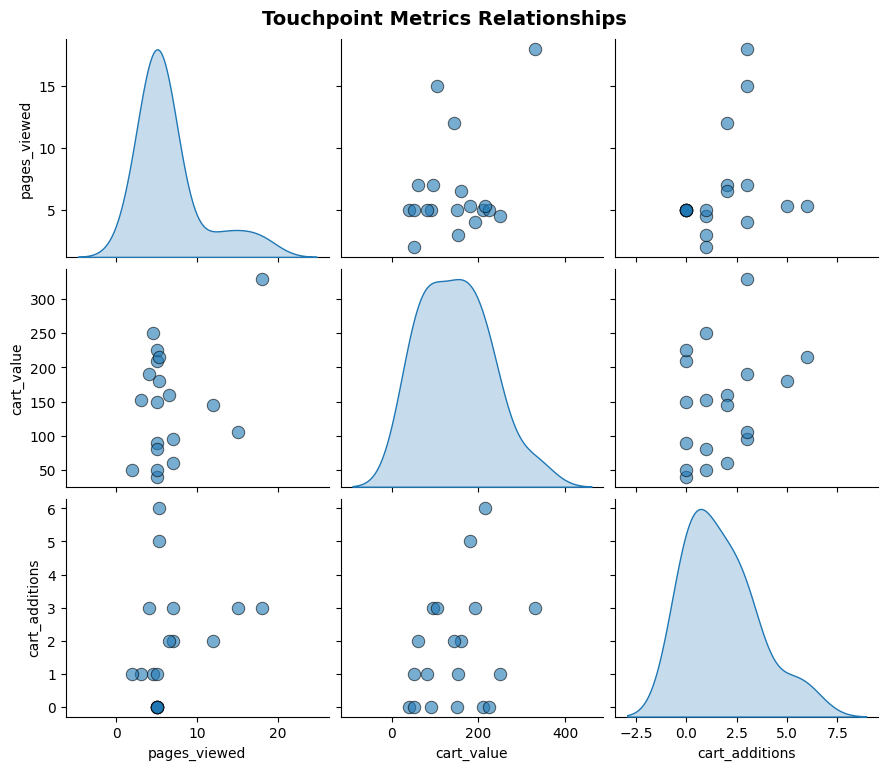


Key observations from pair plot:
  - Relationship between pages viewed and cart value
  - Cart additions correlation with final cart value
  - Engagement patterns across metrics


In [381]:
print("\n" + "=" * 60)
print("PAIR PLOT ANALYSIS")
print("=" * 60)

# Create pair plot for key numeric relationships
touchpoint_summary = cln_df_touchpoints.groupby('customer_id').agg({
    'pages_viewed': 'mean',
    'cart_value': 'max',
    'cart_additions': 'sum',
    'converted_flag': 'max'
}).reset_index()

# Filter for meaningful data
touchpoint_summary = touchpoint_summary[touchpoint_summary['cart_value'] > 0]

print("Creating pair plot for touchpoint metrics...")
pair_data = touchpoint_summary[['pages_viewed', 'cart_value', 'cart_additions']]

fig = sns.pairplot(pair_data, height=2.5, aspect=1.2,
                   plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                   diag_kind='kde')
fig.fig.suptitle('Touchpoint Metrics Relationships', y=1.02, fontsize=14, fontweight='bold')
plt.show()

print("\nKey observations from pair plot:")
print("  - Relationship between pages viewed and cart value")
print("  - Cart additions correlation with final cart value")
print("  - Engagement patterns across metrics")

# Data Transformation

## Customer Journey Sequences

In [382]:
print("\n1. Building Customer Journey Sequences...")

# Create comprehensive journey data
customer_journeys = cln_df_touchpoints.sort_values(['customer_id', 'touchpoint_timestamp']).groupby('customer_id').agg({
    'touchpoint_type': lambda x: ' → '.join(x),
    'channel': lambda x: list(x),
    'device_type': lambda x: list(x),
    'touchpoint_timestamp': lambda x: (x.max() - x.min()).days,
    'converted_flag': 'max',
    'cart_value': 'max',
    'store_id': lambda x: any(x != '0')  # Check if any store visit
}).reset_index()

customer_journeys.columns = ['customer_id', 'journey_path', 'channels_list', 
                             'devices_list', 'journey_days', 'converted', 
                             'max_cart_value', 'visited_store']

# Add touchpoint count
touchpoint_counts = cln_df_touchpoints.groupby('customer_id').size().reset_index(name='touchpoint_count')
customer_journeys = customer_journeys.merge(touchpoint_counts, on='customer_id')

# Add first and last touch channels
first_touch = cln_df_touchpoints.sort_values('touchpoint_timestamp').groupby('customer_id').first()[['channel']].rename(columns={'channel': 'first_channel'})
last_touch = cln_df_touchpoints.sort_values('touchpoint_timestamp').groupby('customer_id').last()[['channel']].rename(columns={'channel': 'last_channel'})

customer_journeys = customer_journeys.merge(first_touch, on='customer_id')
customer_journeys = customer_journeys.merge(last_touch, on='customer_id')

print(f"  Created journey data for {len(customer_journeys)} customers")
print(f"  Average touchpoints per journey: {customer_journeys['touchpoint_count'].mean():.2f}")
customer_journeys


1. Building Customer Journey Sequences...
  Created journey data for 19 customers
  Average touchpoints per journey: 1.42


,customer_id,journey_path,channels_list,devices_list,journey_days,converted,max_cart_value,visited_store,touchpoint_count,first_channel,last_channel
0,1001,Ad Click → Web Visit → Web Visit,"[Instagram, Direct, Email]","[Mobile, Mobile, Mobile]",2,True,179.98,False,3,Instagram,Email
1,1002,Store Visit,[Walk-in],[Store],0,True,39.99,True,1,Walk-in,Walk-in
2,1003,Email Open → Web Visit,"[Email, Email]","[Mobile, Desktop]",0,True,249.99,False,2,Email,Email
3,1004,Email Open,[Email],[Desktop],0,True,209.99,False,1,Email,Email
4,1005,Ad Click → Web Visit,"[TikTok, Direct]","[Mobile, Mobile]",0,True,94.97,False,2,TikTok,Direct
5,1006,Store Visit,[Walk-in],[Store],0,True,224.99,True,1,Walk-in,Walk-in
6,1007,Ad Click → Web Visit,"[Facebook, Direct]","[Desktop, Desktop]",0,True,190.99,False,2,Facebook,Direct
7,1008,Store Visit,[Walk-in],[Store],0,True,149.99,True,1,Walk-in,Walk-in
8,1009,Web Visit,[Google],[Mobile],0,True,59.99,False,1,Google,Google
9,1010,Web Visit,[Direct],[Mobile],0,True,152.98,False,1,Direct,Direct


## Channel Interaction Matrix

In [383]:
print("\n2. Building Channel Interaction Matrix...")

# Create channel transition matrix
transitions = []
for _, journey in customer_journeys.iterrows():
    channels = journey['channels_list']
    if len(channels) > 1:
        for i in range(len(channels) - 1):
            transitions.append({
                'from_channel': channels[i],
                'to_channel': channels[i + 1],
                'customer_id': journey['customer_id']
            })

transition_df = pd.DataFrame(transitions)
transition_matrix = pd.crosstab(transition_df['from_channel'], 
                                transition_df['to_channel'], 
                                normalize='index') * 100

print("  Channel transition matrix created")
print(f"  Total transitions analysed: {len(transitions)}")
transition_df


2. Building Channel Interaction Matrix...
  Channel transition matrix created
  Total transitions analysed: 8


,from_channel,to_channel,customer_id
0,Instagram,Direct,1001
1,Direct,Email,1001
2,Email,Email,1003
3,TikTok,Direct,1005
4,Facebook,Direct,1007
5,Instagram,Google,1011
6,Google,Direct,1011
7,Email,Email,1012


## Attribution Model Calculations

In [384]:
print("\n3. Calculating Attribution Models...")

# Prepare attribution data
attribution_data = []

for _, journey in customer_journeys.iterrows():
    if journey['converted']:
        channels = journey['channels_list']
        unique_channels = list(dict.fromkeys(channels))  # Preserve order, remove duplicates
        
        # First-touch attribution
        attribution_data.append({
            'model': 'first_touch',
            'channel': channels[0] if channels else None,
            'credit': 1.0,
            'customer_id': journey['customer_id']
        })
        
        # Last-touch attribution
        attribution_data.append({
            'model': 'last_touch',
            'channel': channels[-1] if channels else None,
            'credit': 1.0,
            'customer_id': journey['customer_id']
        })
        
        # Linear attribution (equal credit)
        if channels:
            credit_per_touch = 1.0 / len(channels)
            for channel in channels:
                attribution_data.append({
                    'model': 'linear',
                    'channel': channel,
                    'credit': credit_per_touch,
                    'customer_id': journey['customer_id']
                })
        
        # Position-based (40% first, 40% last, 20% middle)
        if len(channels) >= 2:
            # First touch
            attribution_data.append({
                'model': 'position_based',
                'channel': channels[0],
                'credit': 0.4,
                'customer_id': journey['customer_id']
            })
            # Last touch
            attribution_data.append({
                'model': 'position_based',
                'channel': channels[-1],
                'credit': 0.4,
                'customer_id': journey['customer_id']
            })
            # Middle touches
            if len(channels) > 2:
                middle_credit = 0.2 / (len(channels) - 2)
                for channel in channels[1:-1]:
                    attribution_data.append({
                        'model': 'position_based',
                        'channel': channel,
                        'credit': middle_credit,
                        'customer_id': journey['customer_id']
                    })
        elif len(channels) == 1:
            attribution_data.append({
                'model': 'position_based',
                'channel': channels[0],
                'credit': 1.0,
                'customer_id': journey['customer_id']
            })

attribution_df = pd.DataFrame(attribution_data)
print("   Attribution models calculated")
print(f"  Models created: first_touch, last_touch, linear, position_based")


3. Calculating Attribution Models...
   Attribution models calculated
  Models created: first_touch, last_touch, linear, position_based


## Online to Offline Behaviour

In [385]:
print("\n4. Identifying Online-to-Offline Behavior...")

# Identify customers who researched online but bought in-store
online_to_offline = customer_journeys[
    (customer_journeys['first_channel'].isin(['Instagram', 'Tiktok', 'Email', 'Google', 'Facebook'])) &
    (customer_journeys['visited_store'] == True)
]

# Calculate ROPO (Research Online, Purchase Offline) metrics
ropo_customers = len(online_to_offline)
ropo_rate = ropo_customers / len(customer_journeys) * 100

print(f"  ROPO Analysis Complete")
print(f"  ROPO Customers: {ropo_customers} ({ropo_rate:.1f}%)")

# Add online influence flag
customer_journeys['online_influenced'] = customer_journeys['customer_id'].isin(online_to_offline['customer_id'])


4. Identifying Online-to-Offline Behavior...
  ROPO Analysis Complete
  ROPO Customers: 0 (0.0%)


# Descriptive Data Analysis

In [386]:
print("=" * 60)
print("DESCRIPTIVE ANALYSIS - WHAT IS HAPPENING?")
print("=" * 60)

DESCRIPTIVE ANALYSIS - WHAT IS HAPPENING?


## Question 4: Customer Journey Paths Analysis

In [387]:
print("\n" + "=" * 60)
print("QUESTION 4: CUSTOMER JOURNEY PATHS")
print("=" * 60)
print("What are the most common customer journey paths from initial")
print("awareness to purchase, and how many touchpoints typically occur?")
print("-" * 60)

# 1. Touchpoint distribution
touchpoint_dist = customer_journeys['touchpoint_count'].value_counts().sort_index()

print("\n1. TOUCHPOINT DISTRIBUTION:")
print(touchpoint_dist.to_string())
print(f"\nAverage touchpoints: {customer_journeys['touchpoint_count'].mean():.2f}")
print(f"Median touchpoints: {customer_journeys['touchpoint_count'].median():.0f}")
print(f"Mode touchpoints: {touchpoint_dist.idxmax()}")

# 2. Most common journey paths
journey_paths = cln_df_touchpoints.sort_values(['customer_id', 'touchpoint_timestamp']).groupby('customer_id')['channel'].apply(
    lambda x: ' → '.join(x)
).value_counts().head(10)

print("\n2. TOP 10 CUSTOMER JOURNEY PATHS:")
for i, (path, count) in enumerate(journey_paths.items(), 1):
    print(f"  {i}. {path}: {count} customers")

# 3. Journey length by conversion
converted_journeys = customer_journeys[customer_journeys['converted'] == 1]['touchpoint_count'].mean()
non_converted_journeys = customer_journeys[customer_journeys['converted'] == 0]['touchpoint_count'].mean()

print(f"\n3. JOURNEY LENGTH BY OUTCOME:")
print(f"  Converted customers: {converted_journeys:.2f} touchpoints")
print(f"  Non-converted: {non_converted_journeys:.2f} touchpoints")
print(f"  Difference: {converted_journeys - non_converted_journeys:+.2f} touchpoints")


QUESTION 4: CUSTOMER JOURNEY PATHS
What are the most common customer journey paths from initial
awareness to purchase, and how many touchpoints typically occur?
------------------------------------------------------------

1. TOUCHPOINT DISTRIBUTION:
touchpoint_count
1    13
2     4
3     2

Average touchpoints: 1.42
Median touchpoints: 1
Mode touchpoints: 1

2. TOP 10 CUSTOMER JOURNEY PATHS:
  1. Walk-in: 5 customers
  2. Direct: 3 customers
  3. Google: 3 customers
  4. Email → Email: 2 customers
  5. Instagram → Direct → Email: 1 customers
  6. Email: 1 customers
  7. Facebook → Direct: 1 customers
  8. TikTok → Direct: 1 customers
  9. Instagram → Google → Direct: 1 customers
  10. TikTok: 1 customers

3. JOURNEY LENGTH BY OUTCOME:
  Converted customers: 1.42 touchpoints
  Non-converted: nan touchpoints
  Difference: +nan touchpoints


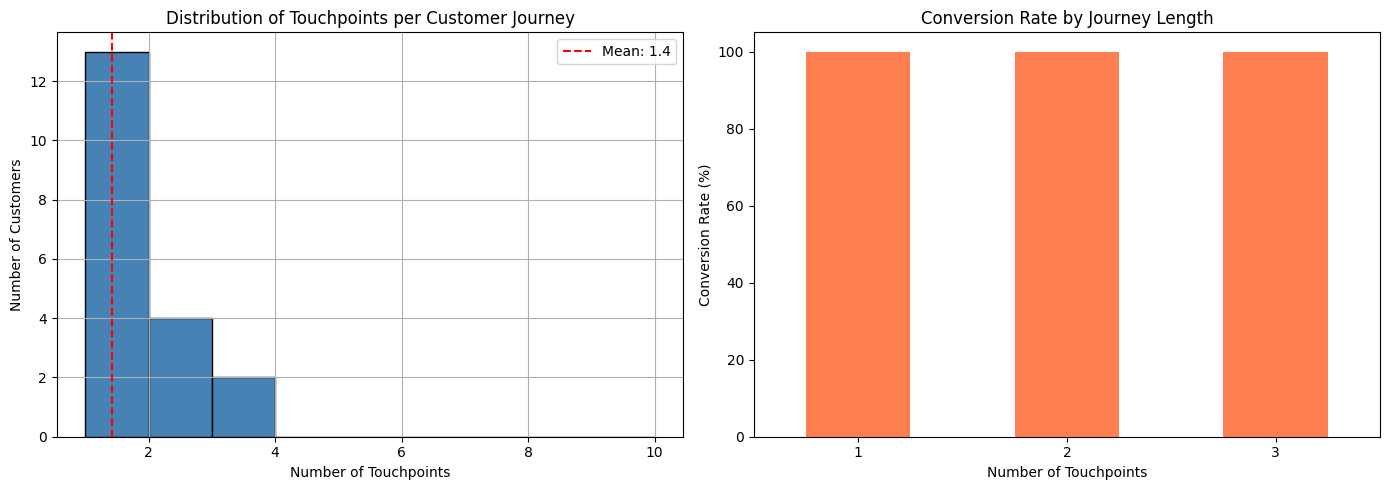

In [388]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Touchpoint distribution histogram
ax1 = axes[0]
customer_journeys['touchpoint_count'].hist(bins=range(1, 11), ax=ax1, color='steelblue', edgecolor='black')
ax1.set_xlabel('Number of Touchpoints')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Distribution of Touchpoints per Customer Journey')
ax1.axvline(customer_journeys['touchpoint_count'].mean(), color='red', linestyle='--', label=f'Mean: {customer_journeys["touchpoint_count"].mean():.1f}')
ax1.legend()

# Conversion by touchpoint count
ax2 = axes[1]
conv_by_touch = customer_journeys.groupby('touchpoint_count')['converted'].mean() * 100
conv_by_touch.plot(kind='bar', ax=ax2, color='coral')
ax2.set_xlabel('Number of Touchpoints')
ax2.set_ylabel('Conversion Rate (%)')
ax2.set_title('Conversion Rate by Journey Length')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Question 5 : Attribution Model Comparison

In [389]:
print("\n" + "=" * 60)
print("QUESTION 5: CHANNEL ATTRIBUTION ANALYSIS")
print("=" * 60)
print("What percentage of revenue should be attributed to each marketing")
print("channel when considering assisted conversions, not just last-click?")
print("-" * 60)

# Calculate attribution by model
attribution_summary = attribution_df.groupby(['model', 'channel'])['credit'].sum().unstack(fill_value=0)
attribution_pct = (attribution_summary.div(attribution_summary.sum(axis=1), axis=0) * 100).round(1)

print("\n1. CHANNEL ATTRIBUTION BY MODEL (%):")
print(attribution_pct.to_string())

# Calculate the difference from last-click
last_click_values = attribution_pct.loc['last_touch']
attribution_diff = attribution_pct.subtract(last_click_values, axis=1)

print("\n2. ATTRIBUTION DIFFERENCE FROM LAST-CLICK:")
print("(Positive = undervalued by last-click, Negative = overvalued)")
print(attribution_diff.loc[['first_touch', 'linear', 'position_based']].to_string())

# Multi-touch attribution recommendation
multi_touch_avg = attribution_pct.loc[['linear', 'position_based']].mean()

print("\n3. RECOMMENDED MULTI-TOUCH ATTRIBUTION:")
for channel, pct in multi_touch_avg.sort_values(ascending=False).items():
    last_click_pct = last_click_values.get(channel, 0)
    diff = pct - last_click_pct
    print(f"  {channel}: {pct:.1f}% (vs {last_click_pct:.1f}% last-click, {diff:+.1f}%)")


QUESTION 5: CHANNEL ATTRIBUTION ANALYSIS
What percentage of revenue should be attributed to each marketing
channel when considering assisted conversions, not just last-click?
------------------------------------------------------------

1. CHANNEL ATTRIBUTION BY MODEL (%):
channel         Direct  Email  Facebook  Google  Instagram  TikTok  Walk-in
model                                                                      
first_touch       15.8   15.8       5.3    15.8       10.5    10.5     26.3
last_touch        31.6   21.1       0.0    15.8        0.0     5.3     26.3
linear            24.6   17.5       2.6    17.5        3.5     7.9     26.3
position_based    24.2   16.5       2.2    17.6        4.4     7.7     27.5

2. ATTRIBUTION DIFFERENCE FROM LAST-CLICK:
(Positive = undervalued by last-click, Negative = overvalued)
channel         Direct  Email  Facebook  Google  Instagram  TikTok  Walk-in
model                                                                      
first_touch

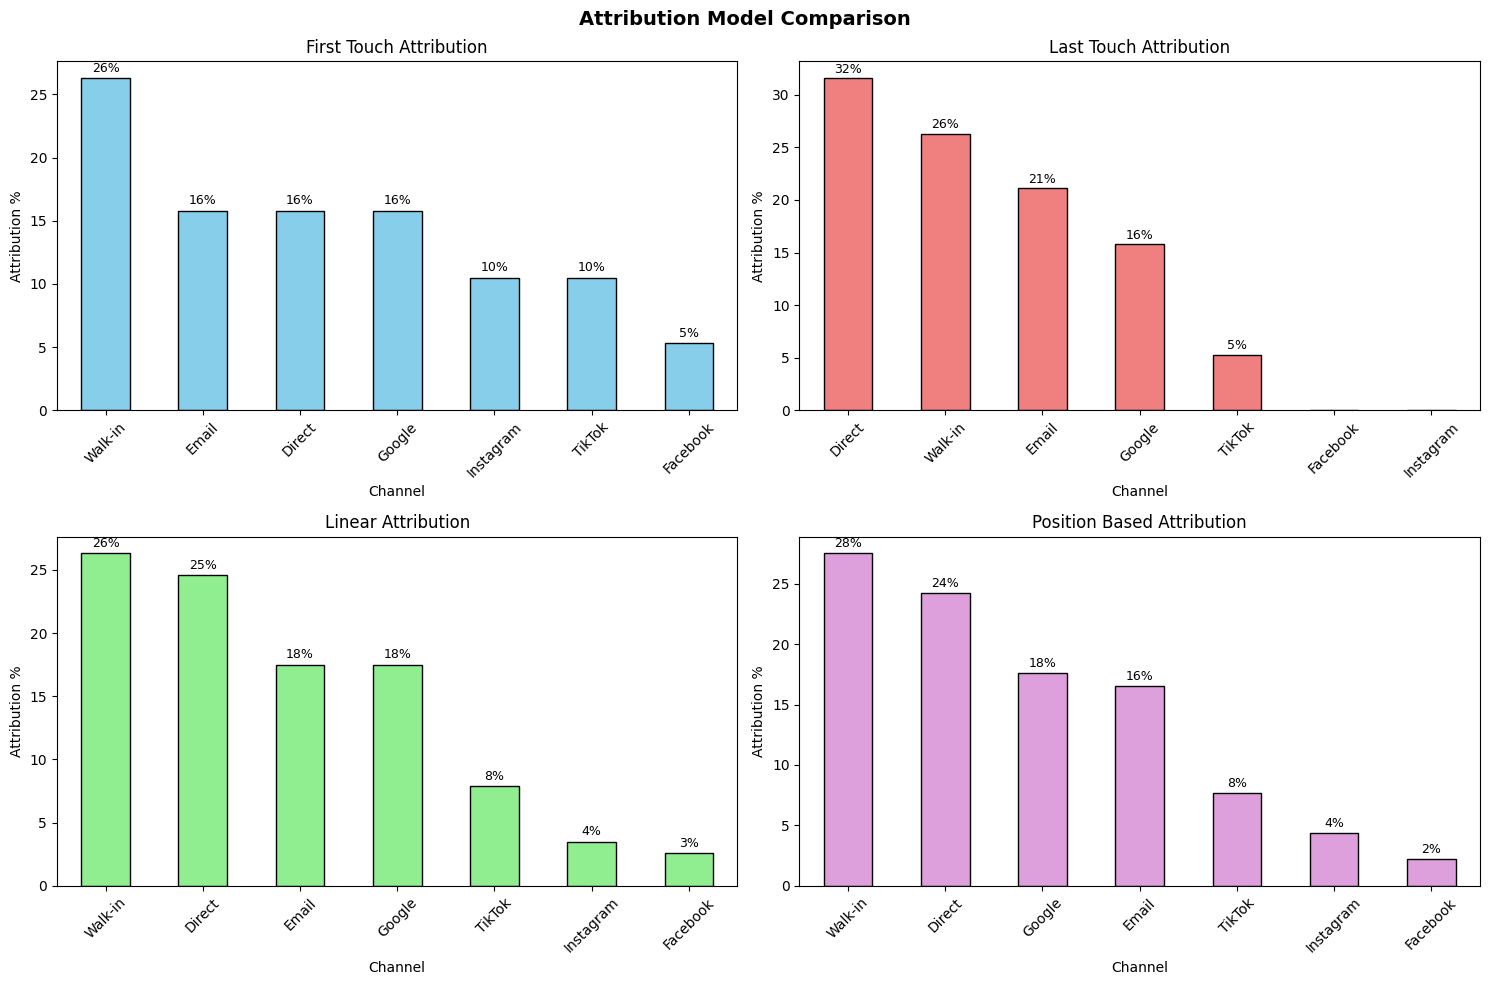

In [390]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Attribution Model Comparison', fontsize=14, fontweight='bold')

models = ['first_touch', 'last_touch', 'linear', 'position_based']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum']

for idx, (model, color) in enumerate(zip(models, colors)):
    ax = axes[idx // 2, idx % 2]
    data = attribution_pct.loc[model].sort_values(ascending=False)
    data.plot(kind='bar', ax=ax, color=color, edgecolor='black')
    ax.set_title(f'{model.replace("_", " ").title()} Attribution')
    ax.set_xlabel('Channel')
    ax.set_ylabel('Attribution %')
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(data):
        if v > 0:
            ax.text(i, v + 0.5, f'{v:.0f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Question 6: Online Channels Driving Store Traffic

In [391]:
print("\n" + "=" * 60)
print("QUESTION 6: ONLINE CHANNELS DRIVING STORE TRAFFIC")
print("=" * 60)
print("Which channels drive store foot traffic even if the")
print("discovery happened online?")
print("-" * 60)

# Analyze store visits influenced by online channels
store_influenced = cln_df_touchpoints[cln_df_touchpoints['store_id'] != '0'].merge(
    customer_journeys[['customer_id', 'first_channel', 'online_influenced']], 
    on='customer_id'
)

# Channels driving store visits
online_driving_store = store_influenced[store_influenced['online_influenced']].groupby('first_channel').size()
online_driving_pct = (online_driving_store / len(store_influenced) * 100).round(1)

print("\n1. ONLINE CHANNELS DRIVING STORE VISITS:")
for channel, pct in online_driving_pct.sort_values(ascending=False).items():
    count = online_driving_store.get(channel, 0)
    print(f"  {channel}: {count} store visits ({pct}% of total store traffic)")

# ROPO analysis by channel
ropo_by_channel = online_to_offline.groupby('first_channel').size()
total_by_channel = customer_journeys.groupby('first_channel').size()
ropo_rate_by_channel = (ropo_by_channel / total_by_channel * 100).fillna(0).round(1)

print("\n2. ROPO RATE BY CHANNEL:")
print("(Research Online, Purchase Offline)")
for channel, rate in ropo_rate_by_channel.sort_values(ascending=False).items():
    count = ropo_by_channel.get(channel, 0)
    print(f"  {channel}: {rate}% ({count} customers)")

# Cross-channel journey patterns
cross_channel_patterns = customer_journeys[
    (customer_journeys['online_influenced']) & 
    (customer_journeys['converted'] == 1)
]['channels_list'].apply(lambda x: len(set(x))).value_counts()

print("\n3. CHANNEL DIVERSITY IN STORE-INFLUENCED JOURNEYS:")
for channels, count in cross_channel_patterns.sort_index().items():
    print(f"  {channels} unique channel(s): {count} customers")


QUESTION 6: ONLINE CHANNELS DRIVING STORE TRAFFIC
Which channels drive store foot traffic even if the
discovery happened online?
------------------------------------------------------------

1. ONLINE CHANNELS DRIVING STORE VISITS:
  Direct: 0 store visits (0.0% of total store traffic)
  Email: 0 store visits (0.0% of total store traffic)
  Facebook: 0 store visits (0.0% of total store traffic)
  Google: 0 store visits (0.0% of total store traffic)
  Instagram: 0 store visits (0.0% of total store traffic)
  TikTok: 0 store visits (0.0% of total store traffic)
  Walk-in: 0 store visits (0.0% of total store traffic)

2. ROPO RATE BY CHANNEL:
(Research Online, Purchase Offline)
  Direct: 0.0% (0 customers)
  Email: 0.0% (0 customers)
  Facebook: 0.0% (0 customers)
  Google: 0.0% (0 customers)
  Instagram: 0.0% (0 customers)
  TikTok: 0.0% (0 customers)
  Walk-in: 0.0% (0 customers)

3. CHANNEL DIVERSITY IN STORE-INFLUENCED JOURNEYS:


In [392]:
### There are no online chnnels that lead to in-store foot traffic so this is commented

# # Visualization
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Online channels driving store traffic
# ax1 = axes[0]
# online_driving_pct.sort_values(ascending=False).plot(kind='bar', ax=ax1, color='steelblue', edgecolor='navy')
# ax1.set_title('Online Channels Driving Store Traffic')
# ax1.set_xlabel('First Touch Channel')
# ax1.set_ylabel('% of Store Traffic')
# ax1.tick_params(axis='x', rotation=45)

# # ROPO rates by channel
# ax2 = axes[1]
# ropo_rate_by_channel.sort_values(ascending=False).plot(kind='bar', ax=ax2, color='coral', edgecolor='darkred')
# ax2.set_title('ROPO Rate by Channel\n(Research Online, Purchase Offline)')
# ax2.set_xlabel('Channel')
# ax2.set_ylabel('ROPO Rate (%)')
# ax2.tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()